# tcvpigpiv: Hourly GPIv Computation and Anomalies

This notebook demonstrates how to use the tcvpigpiv package to compute
ventilated Potential Intensity (vPI) and Genesis Potential Index (GPIv)
from ERA5 hourly reanalysis data.

**Key Features:**
- Load ERA5 hourly data via THREDDS
- Compute GPIv at specific times
- Calculate climatologies
- Compute anomalies relative to climatology

**Author:** Jose Ocegueda Sanchez(2025)

## Summary

The tcvpigpiv package now supports:

1. **Monthly mean data**: `run_vpigpiv(year, month, data_source='monthly')`
2. **Hourly data**: `run_vpigpiv_hourly(year, month, day, hour=hour)`
3. **Climatology**: `compute_monthly_climatology(...)`
4. **Anomalies**: `compute_anomalies(...)` or `run_vpigpiv_hourly(..., compute_anomalies=True)`

In [1]:
# Import required packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Import tcvpigpiv
from tcvpigpiv import (
    run_vpigpiv,
    run_vpigpiv_hourly,
    load_era5_data,
    compute_gpiv_from_dataset,
)

## 1. Monthly Mean GPIv

First, let's compute GPIv from ERA5 monthly mean data (the original functionality).

Loading ERA5 monthly mean data for 2022-09...
  Loading SSTK...
  Loading SP...
  Loading T...
  Loading Q...
  Loading U...
  Loading V...
  Loading VO...
  Data loading complete.
  Calculating Potential Intensity (PI)...
  Calculating Vertical Wind Shear (VWS)...
  Calculating Entropy Deficit (Chi)...
T600: min = 216.72251892089844 , max = 282.0955810546875
rv600: min = 9.35473963181721e-06 , max = 0.008615713566541672
sm_600: min = -85.86386108398438 , max = 255.29278564453125
sm_star_600: min = -85.7264175415039 , max = 291.6622619628906
  Calculating Capped Vorticity (eta_c)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)


  Combining components for final GPIv...
GPIv: min=2.517e-22, max=0.1114, mean=0.009068
vPI: min=2.296, max=130, mean=80.02
PI: min=0, max=131.7, mean=45.57
ventilation_index: min=8.422e-05, max=inf, mean=inf
VWS: min=0.0005493, max=54.79, mean=15.18
Chi: min=-inf, max=inf, mean=nan
eta_c: min=-3.7e-05, max=3.7e-05, mean=3.029e-05


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed

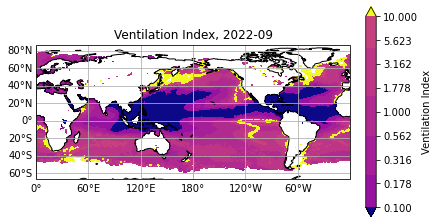

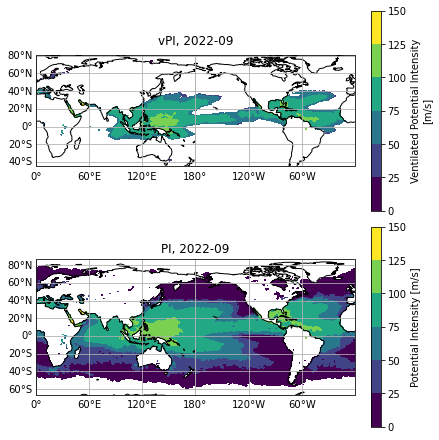

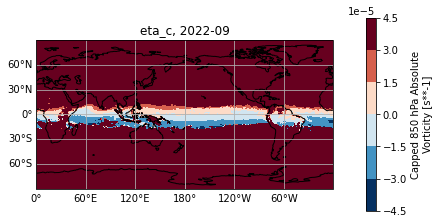

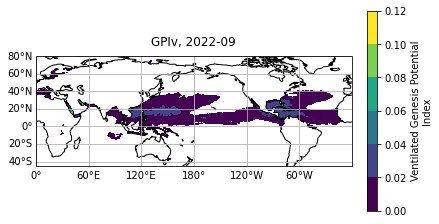


Variables computed: ['GPIv', 'vPI', 'PI', 'ventilation_index', 'VWS', 'Chi', 'eta_c']


In [2]:
# Compute monthly mean GPIv for September 2022
year = 2022
month = 9

results_monthly = run_vpigpiv(year, month, data_source='monthly', plot=True)
print(f"\nVariables computed: {list(results_monthly.data_vars)}")

## 2. Hourly GPIv Computation

Now let's compute GPIv from hourly ERA5 data. This allows us to capture
instantaneous atmospheric conditions.

Loading ERA5 hourly data for 2020-08-15 hour 12...
  Loading SSTK (surface, monthly file)...
  Loading SP (surface, monthly file)...
  Loading T (pressure level, daily file)...
  Loading Q (pressure level, daily file)...
  Loading U (pressure level, daily file)...
  Loading V (pressure level, daily file)...
  Loading VO (pressure level, daily file)...
  Data loading complete.
  Calculating Potential Intensity (PI)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future 

  Calculating Vertical Wind Shear (VWS)...
  Calculating Entropy Deficit (Chi)...
T600: min = 204.8995361328125 , max = 292.8409423828125
rv600: min = 8.782672722418283e-08 , max = 0.012182318605482578
sm_600: min = -142.4475555419922 , max = 292.36602783203125
sm_star_600: min = -142.43028259277344 , max = 438.844482421875
  Calculating Capped Vorticity (eta_c)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)


  Combining components for final GPIv...
GPIv: min=1.204e-23, max=0.1049, mean=0.007804
vPI: min=1.453, max=130.6, mean=75.08
PI: min=0, max=135, mean=44.14
ventilation_index: min=6.218e-07, max=inf, mean=inf
VWS: min=0.001533, max=82.7, mean=19.63
Chi: min=-inf, max=inf, mean=nan
eta_c: min=-3.7e-05, max=3.7e-05, mean=2.912e-05


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed

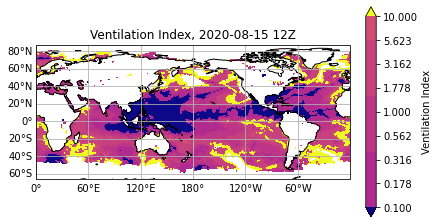

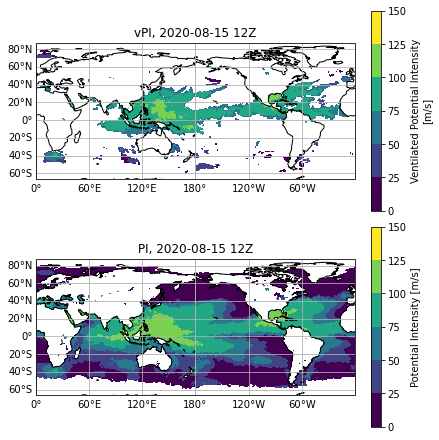

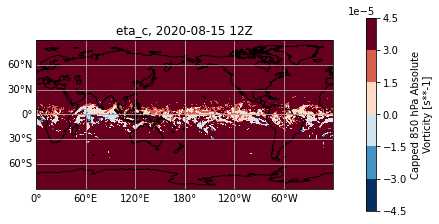

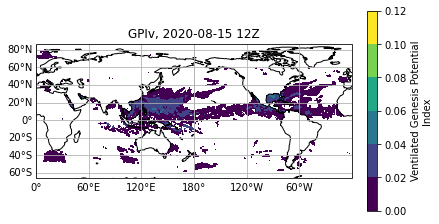


Variables computed: ['GPIv', 'vPI', 'PI', 'ventilation_index', 'VWS', 'Chi', 'eta_c']


In [5]:
# Compute hourly GPIv for August 15, 2020 at 12Z
year = 2020
month = 8
day = 15
hour = 12

results_hourly = run_vpigpiv_hourly(year, month, day, hour=hour, plot=True)
print(f"\nVariables computed: {list(results_hourly.data_vars)}")

## 3. Data Loading Details

Understanding how the ERA5 data is organized is important.

**Hourly Dataset (d633000):**
- Surface variables: Monthly files containing all hours
- Pressure level variables: Daily files containing 24 hours

In [3]:
# Direct data loading example
from tcvpigpiv import load_era5_hourly

# Load hourly data directly
ds = load_era5_hourly(2020, 8, 15, hour=12, verbose=True)

print(f"\nDataset variables: {list(ds.data_vars)}")
print(f"Dataset dimensions: {dict(ds.dims)}")

Loading ERA5 hourly data for 2020-08-15 hour 12...
  Loading SSTK (surface, monthly file)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


  Loading SP (surface, monthly file)...
  Loading T (pressure level, daily file)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


  Loading Q (pressure level, daily file)...
  Loading U (pressure level, daily file)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


  Loading V (pressure level, daily file)...
  Loading VO (pressure level, daily file)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


  Data loading complete.

Dataset variables: ['SSTK', 'SP', 'T', 'Q', 'U', 'V', 'VO']
Dataset dimensions: {'latitude': 721, 'longitude': 1440, 'level': 37}


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


## 4. Computing Climatology

To compute anomalies, we first need a climatology. Here's how to compute one:

In [11]:
from tcvpigpiv import compute_monthly_climatology

# Compute a climatology (this takes a while - use fewer years for testing)
# For a full climatology, use years=range(1980, 2020)
climatology = compute_monthly_climatology(
    compute_gpiv_from_dataset,
    months=[8],  # Just August for this example
    years=range(2015, 2020),  # 5 years for quick testing, default is 1980-2020
    data_source='monthly',
    output_path='gpiv_climatology_august.nc',
    verbose=True
)

print(f"\nClimatology variables: {list(climatology.data_vars)}")


Computing climatology for month 08
  Processing 2015-08...
  Calculating Potential Intensity (PI)...
  Calculating Vertical Wind Shear (VWS)...
  Calculating Entropy Deficit (Chi)...
  Calculating Capped Vorticity (eta_c)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)


  Combining components for final GPIv...
  Processing 2016-08...
  Calculating Potential Intensity (PI)...
  Calculating Vertical Wind Shear (VWS)...
  Calculating Entropy Deficit (Chi)...
  Calculating Capped Vorticity (eta_c)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)


  Combining components for final GPIv...
  Processing 2017-08...
  Calculating Potential Intensity (PI)...
  Calculating Vertical Wind Shear (VWS)...
  Calculating Entropy Deficit (Chi)...
  Calculating Capped Vorticity (eta_c)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)


  Combining components for final GPIv...
  Processing 2018-08...
  Calculating Potential Intensity (PI)...
  Calculating Vertical Wind Shear (VWS)...
  Calculating Entropy Deficit (Chi)...
  Calculating Capped Vorticity (eta_c)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)


  Combining components for final GPIv...
  Processing 2019-08...
  Calculating Potential Intensity (PI)...
  Calculating Vertical Wind Shear (VWS)...
  Calculating Entropy Deficit (Chi)...
  Calculating Capped Vorticity (eta_c)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)


  Combining components for final GPIv...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Climatology saved to: gpiv_climatology_august.nc

Climatology variables: ['GPIv', 'vPI', 'PI', 'ventilation_index', 'VWS', 'Chi', 'eta_c']


## 5. Computing Anomalies

Now we can compute anomalies relative to the climatology:

In [6]:
from tcvpigpiv import load_climatology, compute_anomalies

# Load the climatology
clim = load_climatology('gpiv_climatology_august.nc')

# Compute anomalies for the hourly data
anomalies = compute_anomalies(results_hourly, clim, month=8)

print(f"\nAnomaly variables: {list(anomalies.data_vars)}")


Anomaly variables: ['eta_c_anom', 'eta_c', 'eta_c_clim', 'Chi_anom', 'Chi', 'Chi_clim', 'PI_anom', 'PI', 'PI_clim', 'VWS_anom', 'VWS', 'VWS_clim', 'vPI_anom', 'vPI', 'vPI_clim', 'ventilation_index_anom', 'ventilation_index', 'ventilation_index_clim', 'GPIv_anom', 'GPIv', 'GPIv_clim']


## 6. Visualization

/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/Users/jocegue/opt/anaconda3/

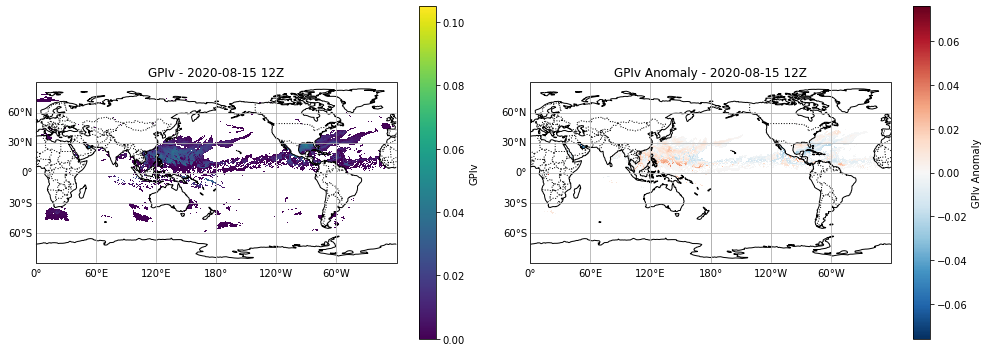

In [7]:
# Plot GPIv and its anomaly
fig, axes = plt.subplots(1, 2, figsize=(14, 5),
                         subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

# GPIv
ax = axes[0]
results_hourly['GPIv'].plot(ax=ax, transform=ccrs.PlateCarree(), 
                            cmap='viridis', cbar_kwargs={'label': 'GPIv'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title(f'GPIv - {year}-{month:02d}-{day:02d} {hour:02d}Z')
gl = ax.gridlines(draw_labels=True)
gl.top_labels = gl.right_labels = False

# GPIv Anomaly
ax = axes[1]
if 'GPIv_anom' in anomalies:
    anomalies['GPIv_anom'].plot(ax=ax, transform=ccrs.PlateCarree(),
                                cmap='RdBu_r', cbar_kwargs={'label': 'GPIv Anomaly'})
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_title(f'GPIv Anomaly - {year}-{month:02d}-{day:02d} {hour:02d}Z')
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = gl.right_labels = False

plt.tight_layout()
plt.show()

## 7. Using run_vpigpiv_hourly with Anomalies

The easiest way to compute both GPIv and anomalies in one call:

In [8]:
# All-in-one computation with anomalies
results_with_anom = run_vpigpiv_hourly(
    2020, 8, 15, hour=12,
    compute_anomalies=True,
    climatology_path='gpiv_climatology_august.nc',
    plot=False
)

print(f"Variables: {list(results_with_anom.data_vars)}")

Loading ERA5 hourly data for 2020-08-15 hour 12...
  Loading SSTK (surface, monthly file)...
  Loading SP (surface, monthly file)...
  Loading T (pressure level, daily file)...
  Loading Q (pressure level, daily file)...
  Loading U (pressure level, daily file)...
  Loading V (pressure level, daily file)...
  Loading VO (pressure level, daily file)...
  Data loading complete.
  Calculating Potential Intensity (PI)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future 

  Calculating Vertical Wind Shear (VWS)...
  Calculating Entropy Deficit (Chi)...
T600: min = 204.8995361328125 , max = 292.8409423828125
rv600: min = 8.782672722418283e-08 , max = 0.012182318605482578
sm_600: min = -142.4475555419922 , max = 292.36602783203125
sm_star_600: min = -142.43028259277344 , max = 438.844482421875
  Calculating Capped Vorticity (eta_c)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)


  Combining components for final GPIv...
GPIv: min=1.204e-23, max=0.1049, mean=0.007804
vPI: min=1.453, max=130.6, mean=75.08
PI: min=0, max=135, mean=44.14
ventilation_index: min=6.218e-07, max=inf, mean=inf
VWS: min=0.001533, max=82.7, mean=19.63
Chi: min=-inf, max=inf, mean=nan
eta_c: min=-3.7e-05, max=3.7e-05, mean=2.912e-05

Computing anomalies relative to month 8 climatology...
Anomaly fields added.
Variables: ['GPIv', 'vPI', 'PI', 'ventilation_index', 'VWS', 'Chi', 'eta_c', 'eta_c_anom', 'eta_c_clim', 'Chi_anom', 'Chi_clim', 'PI_anom', 'PI_clim', 'VWS_anom', 'VWS_clim', 'vPI_anom', 'vPI_clim', 'ventilation_index_anom', 'ventilation_index_clim', 'GPIv_anom', 'GPIv_clim']


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


## 8. Time Series Analysis

Load multiple hours to analyze temporal evolution:

In [9]:
from tcvpigpiv import load_era5_hourly_range
from datetime import datetime

# Load a range of dates (at specific synoptic hours)
# Warning: This can take a while!
ds_range = load_era5_hourly_range(
    datetime(2020, 8, 15),
    datetime(2020, 8, 16),
    hours=[0, 12],  # Just 00Z and 12Z
    verbose=True
)

print(f"\nTime range: {ds_range.time.values}")

Loading ERA5 hourly data for 2020-08-15 hour 00...
  Loading SSTK (surface, monthly file)...
  Loading SP (surface, monthly file)...
  Loading T (pressure level, daily file)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


  Loading Q (pressure level, daily file)...
  Loading U (pressure level, daily file)...
  Loading V (pressure level, daily file)...
  Loading VO (pressure level, daily file)...
  Data loading complete.
Loading ERA5 hourly data for 2020-08-15 hour 12...
  Loading SSTK (surface, monthly file)...
  Loading SP (surface, monthly file)...
  Loading T (pressure level, daily file)...
  Loading Q (pressure level, daily file)...
  Loading U (pressure level, daily file)...
  Loading V (pressure level, daily file)...
  Loading VO (pressure level, daily file)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future 

  Data loading complete.
Loading ERA5 hourly data for 2020-08-16 hour 00...
  Loading SSTK (surface, monthly file)...
  Loading SP (surface, monthly file)...
  Loading T (pressure level, daily file)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


  Loading Q (pressure level, daily file)...
  Loading U (pressure level, daily file)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


  Loading V (pressure level, daily file)...
  Loading VO (pressure level, daily file)...


/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jocegue/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future 

  Data loading complete.
Loading ERA5 hourly data for 2020-08-16 hour 12...
  Loading SSTK (surface, monthly file)...
  Loading SP (surface, monthly file)...
  Loading T (pressure level, daily file)...
  Loading Q (pressure level, daily file)...
  Loading U (pressure level, daily file)...
  Loading V (pressure level, daily file)...
  Loading VO (pressure level, daily file)...
  Data loading complete.

Time range: ['2020-08-15T00:00:00.000000000' '2020-08-15T12:00:00.000000000'
 '2020-08-16T00:00:00.000000000' '2020-08-16T12:00:00.000000000']
